In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_excel('Dry_Bean_Dataset.xlsx')


In [16]:
# 1.2 Изучение структуры данных
print("Первые 5 строк датасета")
display(df.head())

print("\nОбщая информация о типах данных и пропусков")
print(df.info())

print("\nПроверка наличия пропущенных значений")
print(df.isnull().sum())

Первые 5 строк датасета


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER



Общая информация о типах данных и пропусков
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class        

In [12]:
# 1.4 Разделение на признаки (X) и целевую переменную (y)
X = df.drop('Class', axis=1)
y = df['Class']

# 1.5 Разделение на обучающую и тестовую выборки (80% на 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- Результаты разделения ---")
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


--- Результаты разделения ---
Размер обучающей выборки: (10888, 16)
Размер тестовой выборки: (2723, 16)


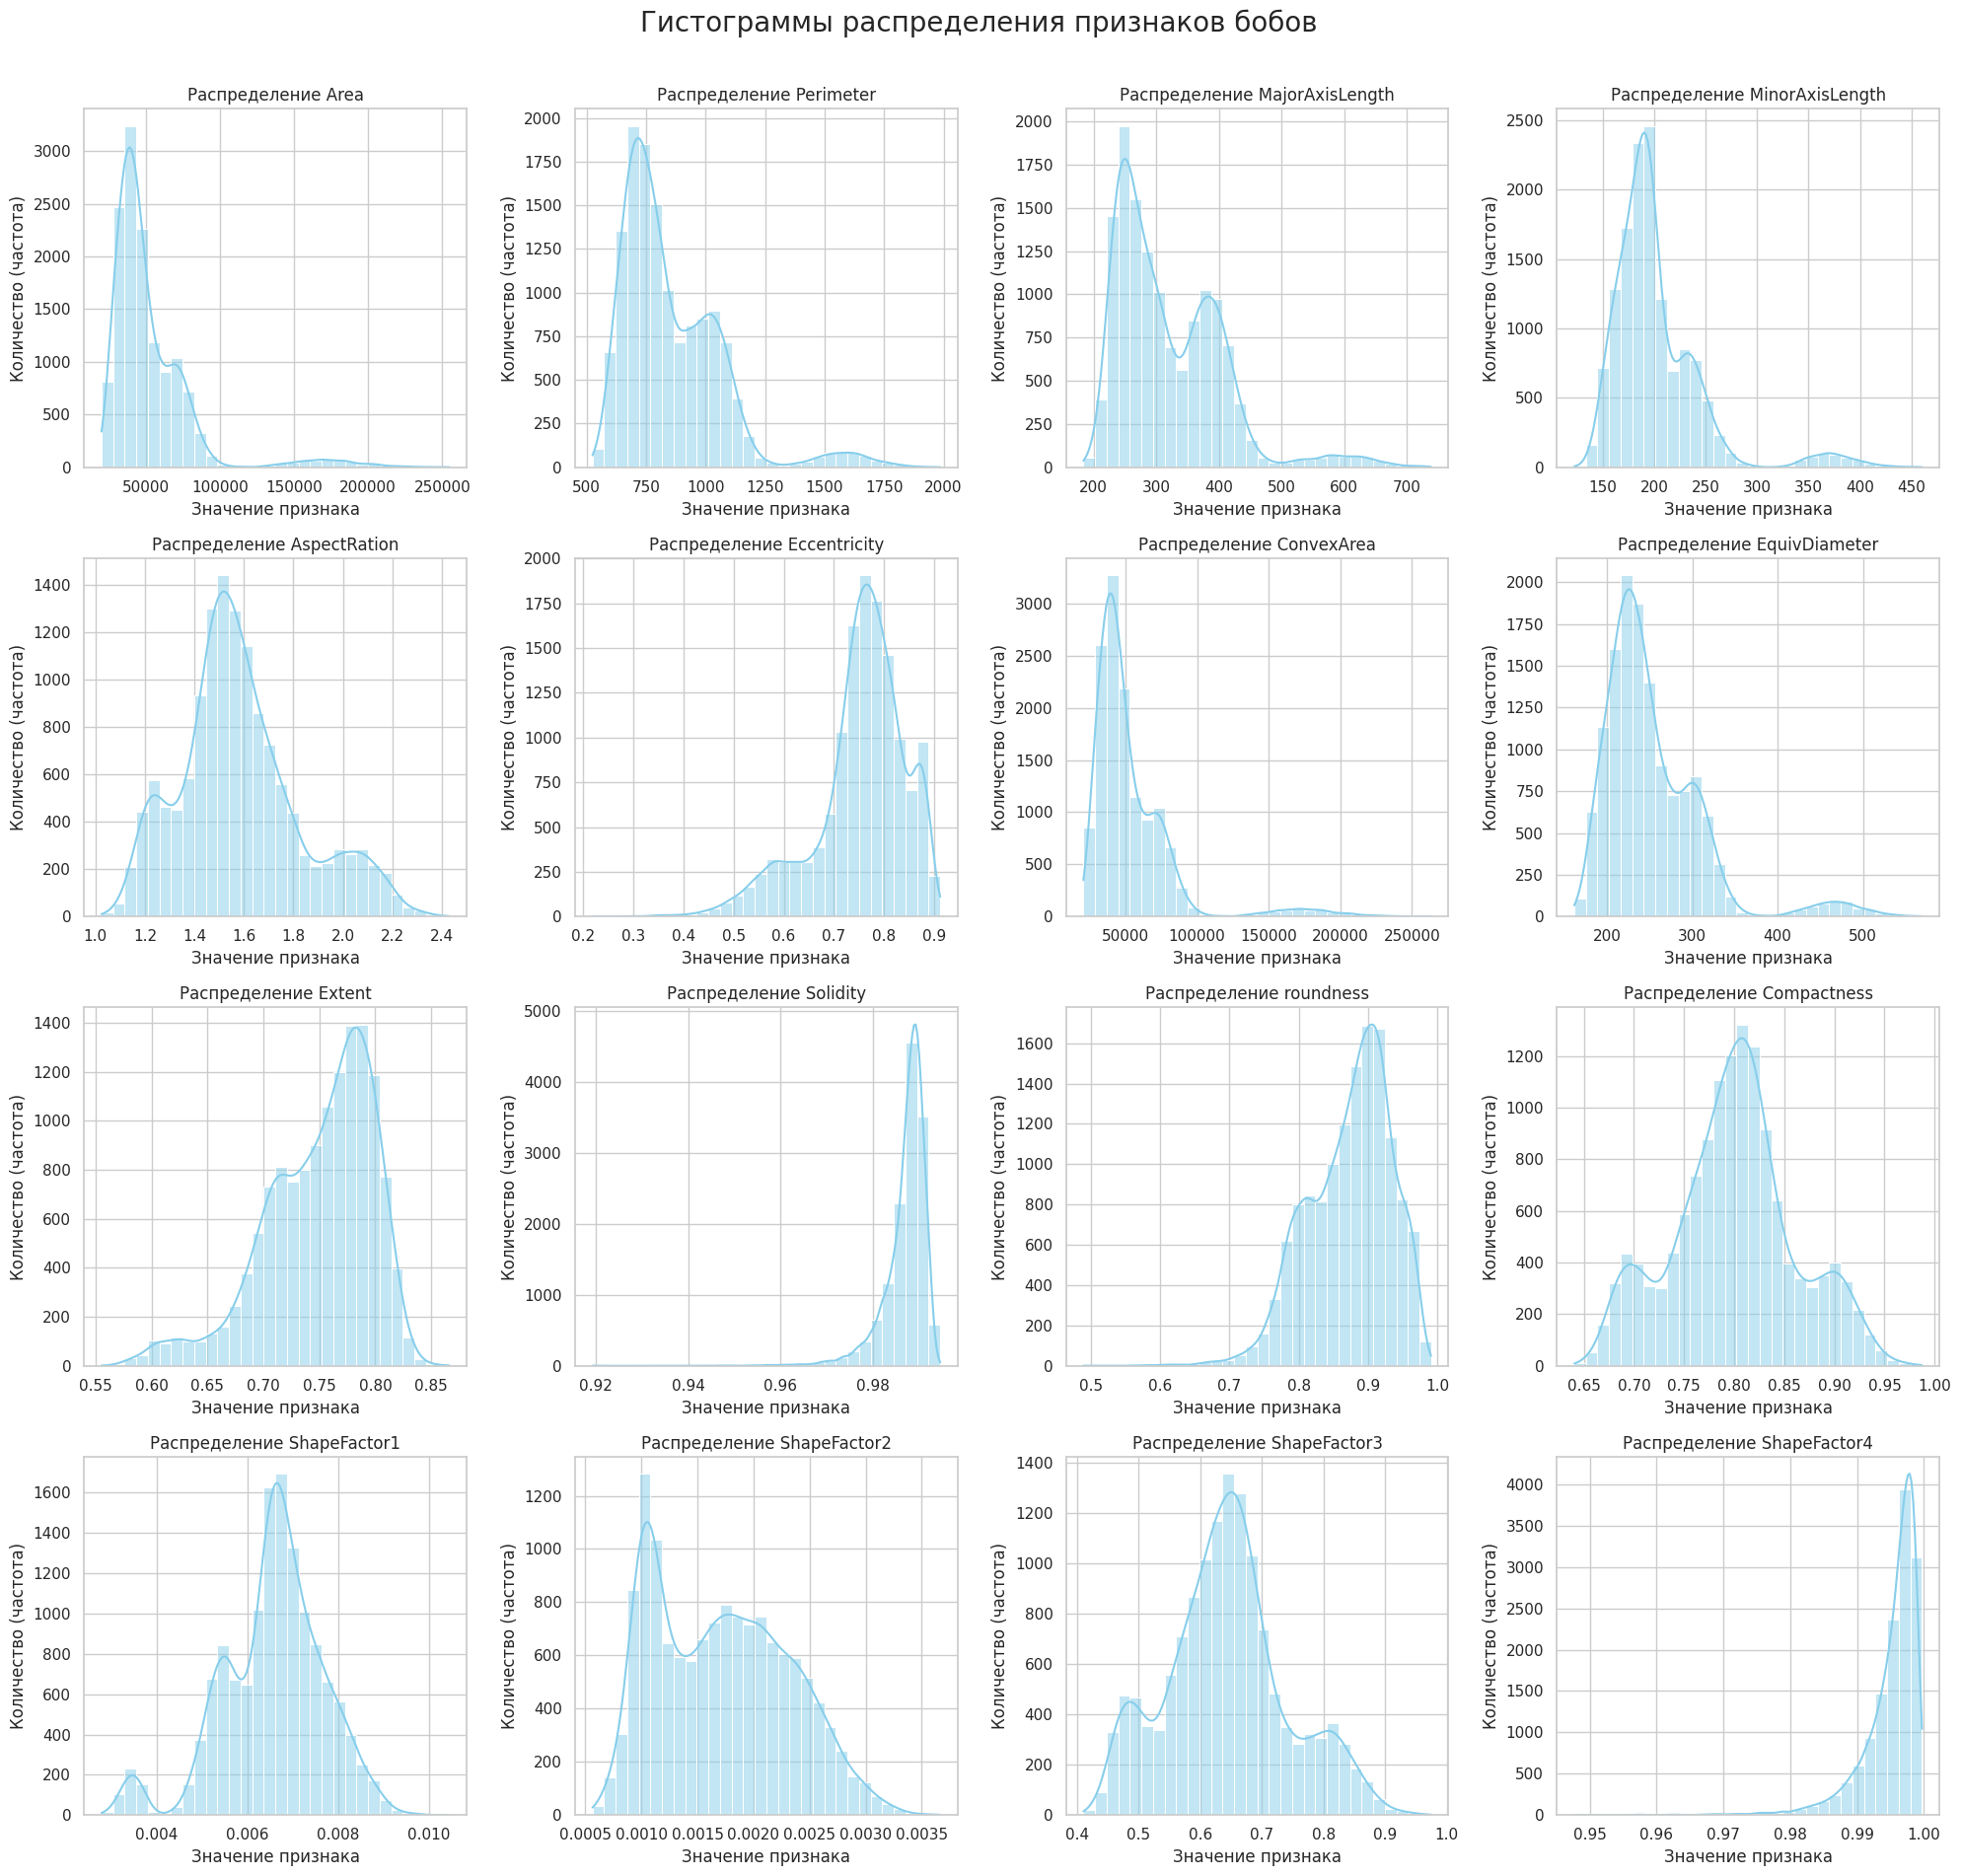

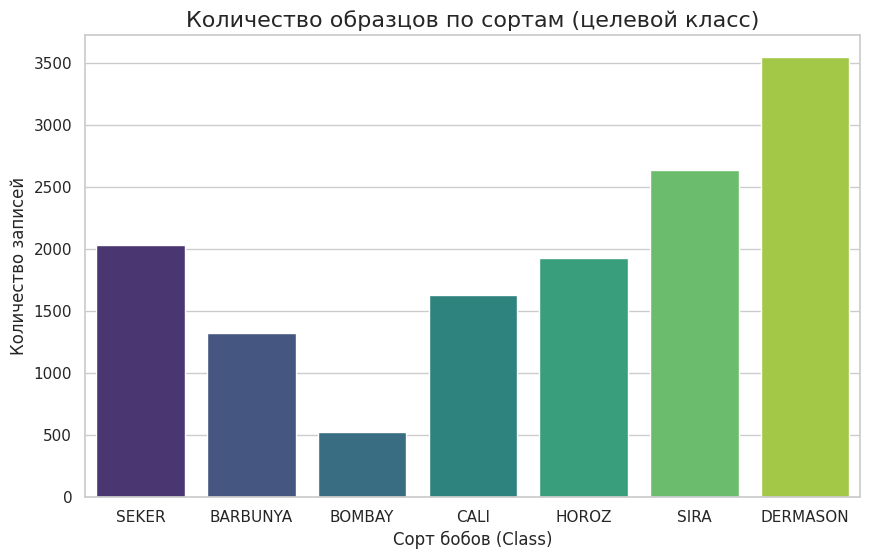

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# 1. Гистограммы для всех числовых признаков
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, ax=axes[i], color='skyblue', kde=True)
    axes[i].set_title(f"Распределение {col}", fontsize=12)
    axes[i].set_xlabel("Значение признака")
    axes[i].set_ylabel("Количество (частота)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Гистограммы распределения признаков бобов", fontsize=20)
plt.show()

# 2. Распределение целевого класса
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Class', palette='viridis', hue='Class', legend=False)
plt.title("Количество образцов по сортам (целевой класс)", fontsize=16)
plt.xlabel("Сорт бобов (Class)")
plt.ylabel("Количество записей")
plt.xticks(rotation=0)
plt.show()

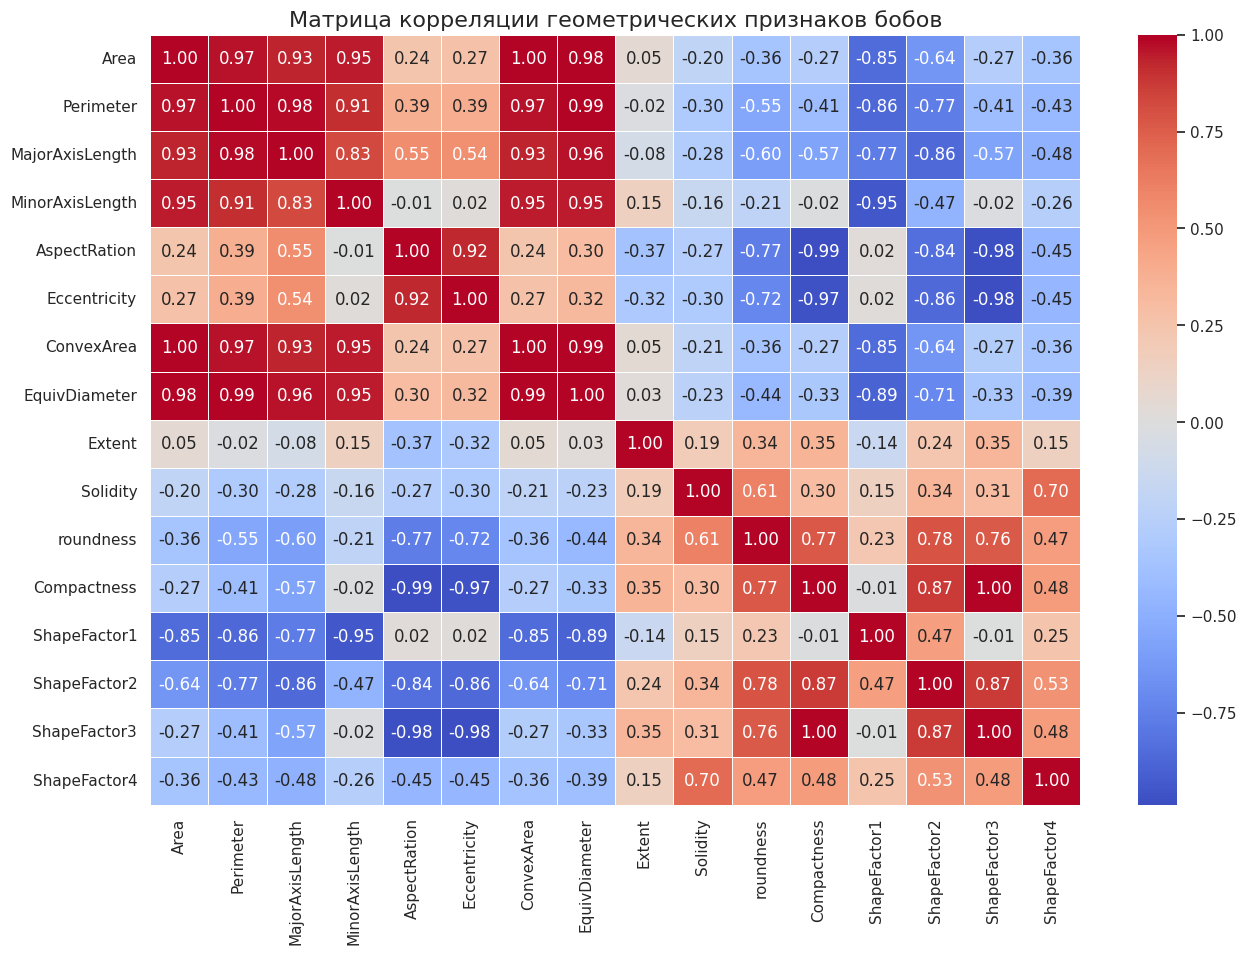

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.drop('Class', axis=1).corr()

plt.figure(figsize=(15, 10))

# Построение тепловой карты
sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            linewidths=0.5)

plt.title("Матрица корреляции геометрических признаков бобов", fontsize=16)
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
# 1. Инициализация модели
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Обучение модели
rf_model.fit(X_train, y_train)
print("Модель успешно обучена!")

# 3. Предварительное предсказание на обучающей выборке
train_predictions = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Точность на обучающей выборке: {train_accuracy:.4f}")

Модель успешно обучена!
Точность на обучающей выборке: 1.0000


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
# Детальный отчет по метрикам для обучающей выборки
report = classification_report(y_train, train_predictions)

print("Отчет о классификации (Обучающая выборка)")
print(report)

Отчет о классификации (Обучающая выборка)
              precision    recall  f1-score   support

    BARBUNYA       1.00      1.00      1.00      1057
      BOMBAY       1.00      1.00      1.00       418
        CALI       1.00      1.00      1.00      1304
    DERMASON       1.00      1.00      1.00      2837
       HOROZ       1.00      1.00      1.00      1542
       SEKER       1.00      1.00      1.00      1621
        SIRA       1.00      1.00      1.00      2109

    accuracy                           1.00     10888
   macro avg       1.00      1.00      1.00     10888
weighted avg       1.00      1.00      1.00     10888



Отчет о классификации (ТЕСТОВАЯ ВЫБОРКА)
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.89      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.94      0.94      0.94       326
    DERMASON       0.90      0.92      0.91       709
       HOROZ       0.97      0.95      0.96       386
       SEKER       0.94      0.96      0.95       406
        SIRA       0.86      0.86      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



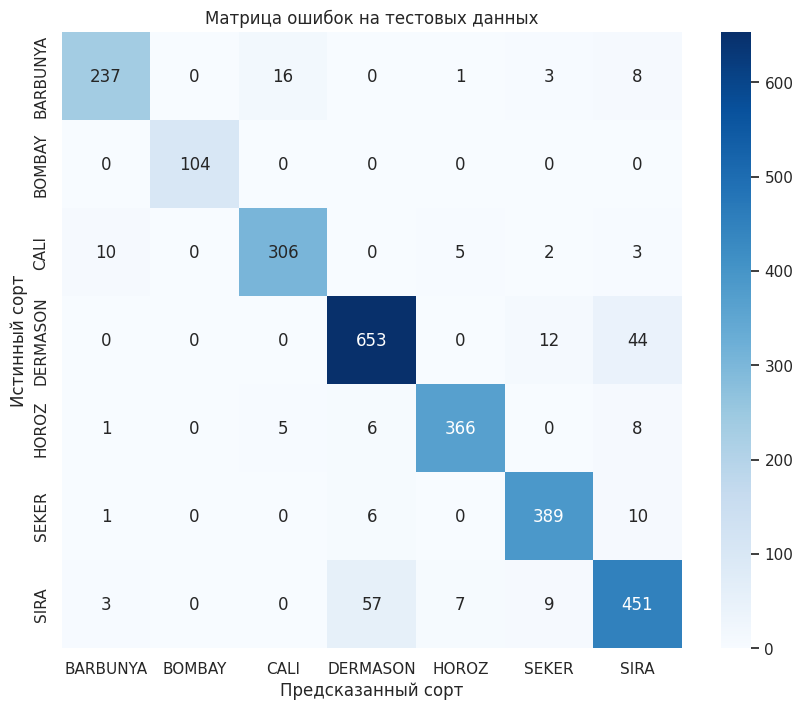

In [19]:
# Предсказание на тестовых данных
test_predictions = rf_model.predict(X_test)

print("Отчет о классификации (ТЕСТОВАЯ ВЫБОРКА)")
print(classification_report(y_test, test_predictions))

from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.title('Матрица ошибок на тестовых данных')
plt.ylabel('Истинный сорт')
plt.xlabel('Предсказанный сорт')
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

rf_model_scaled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_scaled.fit(X_train_scaled, y_train)

test_predictions_scaled = rf_model_scaled.predict(X_test_scaled)

print("Отчет о классификации (ПОСЛЕ МАСШТАБИРОВАНИЯ)")
print(classification_report(y_test, test_predictions_scaled))

Отчет о классификации (ПОСЛЕ МАСШТАБИРОВАНИЯ)
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.89      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.94      0.94      0.94       326
    DERMASON       0.90      0.92      0.91       709
       HOROZ       0.97      0.95      0.96       386
       SEKER       0.94      0.96      0.95       406
        SIRA       0.86      0.86      0.86       527

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



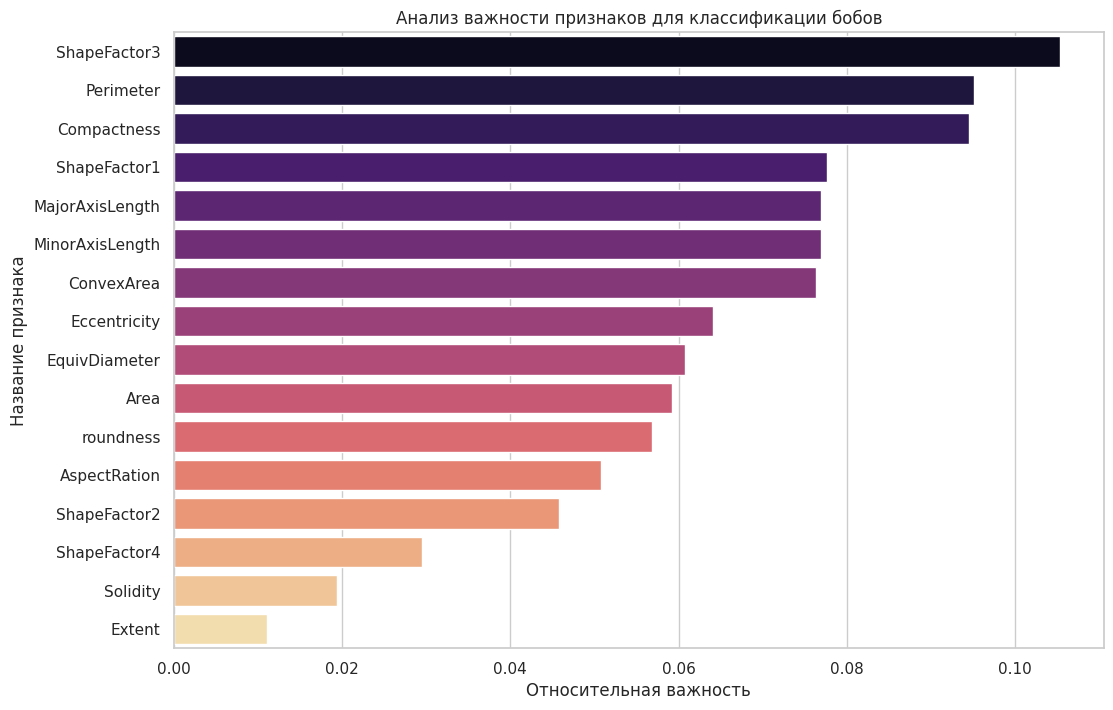

In [22]:
import pandas as pd

# Важность признаков из обученной модели
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Признак': feature_names, 'Важность': importances})
feature_importance_df = feature_importance_df.sort_values(by='Важность', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Важность', y='Признак', data=feature_importance_df,
            hue='Признак', palette='magma', legend=False)
plt.title('Анализ важности признаков для классификации бобов')
plt.xlabel('Относительная важность')
plt.ylabel('Название признака')
plt.show()

In [23]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Сетка параметров для тестирования
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Объект для поиска
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

print("Начинаем поиск лучших параметров...")
random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
print(f"Лучшие параметры: {random_search.best_params_}")

optimized_predictions = best_rf.predict(X_test)
print("Отчет после оптимизации параметров")
print(classification_report(y_test, optimized_predictions))

Начинаем поиск лучших параметров...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Лучшие параметры: {'n_estimators': 300, 'min_samples_split': 10, 'max_depth': 30, 'criterion': 'entropy'}
Отчет после оптимизации параметров
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.88      0.91       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.94      0.94       326
    DERMASON       0.91      0.92      0.92       709
       HOROZ       0.97      0.95      0.96       386
       SEKER       0.94      0.96      0.95       406
        SIRA       0.85      0.86      0.86       527

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('SVM (RBF Kernel)', SVC(kernel='rbf', random_state=42)),
    ('Random Forest (Optimized)', best_rf)
]

results = []

for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results.append({'Algorithm': name, 'Accuracy': acc})

comparison_df = pd.DataFrame(results)
print("Сравнение точности алгоритмов")
print(comparison_df.sort_values(by='Accuracy', ascending=False))

Сравнение точности алгоритмов
                   Algorithm  Accuracy
1           SVM (RBF Kernel)  0.922145
0        Logistic Regression  0.921410
2  Random Forest (Optimized)  0.920308
